## K-Means Clustering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
comic_con = {'x_coordinate': {0: 17,
  1: 20,
  2: 35,
  3: 14,
  4: 37,
  5: 33,
  6: 14,
  7: 30,
  8: 35,
  9: 17,
  10: 11,
  11: 21,
  12: 13,
  13: 10,
  14: 81,
  15: 84,
  16: 87,
  17: 83,
  18: 90,
  19: 97,
  20: 94,
  21: 88,
  22: 89,
  23: 93,
  24: 92,
  25: 82,
  26: 81,
  27: 92,
  28: 91,
  29: 22,
  30: 23,
  31: 25,
  32: 25,
  33: 27,
  34: 17,
  35: 17},
 'x_scaled': {0: 0.5093490504878759,
  1: 0.59923417704456,
  2: 1.04865980982798,
  3: 0.419463923931192,
  4: 1.1085832275324359,
  5: 0.9887363921235239,
  6: 0.419463923931192,
  7: 0.8988512655668399,
  8: 1.04865980982798,
  9: 0.5093490504878759,
  10: 0.32957879737450796,
  11: 0.629195885896788,
  12: 0.389502215078964,
  13: 0.29961708852228,
  14: 2.426898417030468,
  15: 2.516783543587152,
  16: 2.606668670143836,
  17: 2.486821834734924,
  18: 2.69655379670052,
  19: 2.9062857586661157,
  20: 2.8164006321094317,
  21: 2.6366303789960637,
  22: 2.666592087848292,
  23: 2.786438923257204,
  24: 2.756477214404976,
  25: 2.4568601258826956,
  26: 2.426898417030468,
  27: 2.756477214404976,
  28: 2.7265155055527477,
  29: 0.6591575947490159,
  30: 0.689119303601244,
  31: 0.7490427213056999,
  32: 0.7490427213056999,
  33: 0.8089661390101559,
  34: 0.5093490504878759,
  35: 0.5093490504878759},
 'y_coordinate': {0: 4,
  1: 6,
  2: 0,
  3: 0,
  4: 4,
  5: 3,
  6: 1,
  7: 6,
  8: 5,
  9: 4,
  10: 6,
  11: 10,
  12: 8,
  13: 10,
  14: 97,
  15: 94,
  16: 99,
  17: 95,
  18: 95,
  19: 97,
  20: 99,
  21: 99,
  22: 94,
  23: 99,
  24: 90,
  25: 98,
  26: 100,
  27: 93,
  28: 98,
  29: 15,
  30: 10,
  31: 0,
  32: 10,
  33: 7,
  34: 17,
  35: 15},
 'y_scaled': {0: 0.0900098453652847,
  1: 0.13501476804792703,
  2: 0.0,
  3: 0.0,
  4: 0.0900098453652847,
  5: 0.06750738402396352,
  6: 0.022502461341321174,
  7: 0.13501476804792703,
  8: 0.11251230670660586,
  9: 0.0900098453652847,
  10: 0.13501476804792703,
  11: 0.22502461341321173,
  12: 0.1800196907305694,
  13: 0.22502461341321173,
  14: 2.182738750108154,
  15: 2.11523136608419,
  16: 2.227743672790796,
  17: 2.1377338274255115,
  18: 2.1377338274255115,
  19: 2.182738750108154,
  20: 2.227743672790796,
  21: 2.227743672790796,
  22: 2.11523136608419,
  23: 2.227743672790796,
  24: 2.0252215207189055,
  25: 2.205241211449475,
  26: 2.250246134132117,
  27: 2.092728904742869,
  28: 2.205241211449475,
  29: 0.3375369201198176,
  30: 0.22502461341321173,
  31: 0.0,
  32: 0.22502461341321173,
  33: 0.15751722938924823,
  34: 0.38254184280245995,
  35: 0.3375369201198176}}
comic_con = pd.DataFrame(comic_con,columns = ['x_coordinate', 'y_coordinate', 'x_scaled', 'y_scaled'])

### K-means clustering: first exercise

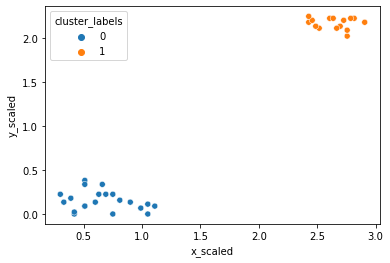

In [4]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']],cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

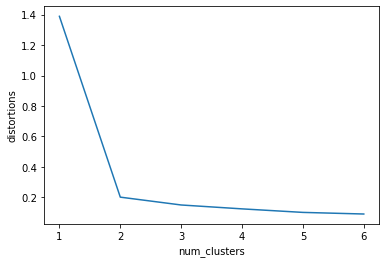

In [5]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Elbow method on uniform data

In [15]:
uniform_data = {'x_coordinate': {0: 39,
  1: 42,
  2: 58,
  3: 43,
  4: 13,
  5: 32,
  6: 60,
  7: 13,
  8: 26,
  9: 27,
  10: 29,
  11: 51,
  12: 14,
  13: 50,
  14: 62,
  15: 59,
  16: 50,
  17: 62,
  18: 65,
  19: 17,
  20: 25,
  21: 45,
  22: 55,
  23: 48,
  24: 42,
  25: 58,
  26: 68,
  27: 58,
  28: 37,
  29: 55},
 'x_scaled': {0: 2.376199107393584,
  1: 2.5589836541161675,
  2: 3.5338345699699456,
  3: 2.6199118363570286,
  4: 0.7920663691311947,
  5: 1.949701831707556,
  6: 3.6556909344516675,
  7: 0.7920663691311947,
  8: 1.5841327382623893,
  9: 1.6450609205032505,
  10: 1.7669172849849728,
  11: 3.1073372942839175,
  12: 0.8529945513720558,
  13: 3.0464091120430563,
  14: 3.77754729893339,
  15: 3.5947627522108068,
  16: 3.0464091120430563,
  17: 3.77754729893339,
  18: 3.9603318456559733,
  19: 1.035779098094639,
  20: 1.5232045560215282,
  21: 2.741768200838751,
  22: 3.351050023247362,
  23: 2.924552747561334,
  24: 2.5589836541161675,
  25: 3.5338345699699456,
  26: 4.143116392378556,
  27: 3.5338345699699456,
  28: 2.2543427429118617,
  29: 3.351050023247362},
 'y_coordinate': {0: 3,
  1: 7,
  2: 3,
  3: 3,
  4: 6,
  5: 5,
  6: 3,
  7: 4,
  8: 0,
  9: 9,
  10: 6,
  11: 3,
  12: 0,
  13: 7,
  14: 4,
  15: 1,
  16: 3,
  17: 0,
  18: 2,
  19: 5,
  20: 9,
  21: 5,
  22: 8,
  23: 6,
  24: 3,
  25: 1,
  26: 4,
  27: 2,
  28: 8,
  29: 7},
 'y_scaled': {0: 1.152237477571589,
  1: 2.6885541143337073,
  2: 1.152237477571589,
  3: 1.152237477571589,
  4: 2.304474955143178,
  5: 1.920395795952648,
  6: 1.152237477571589,
  7: 1.5363166367621184,
  8: 0.0,
  9: 3.4567124327147667,
  10: 2.304474955143178,
  11: 1.152237477571589,
  12: 0.0,
  13: 2.6885541143337073,
  14: 1.5363166367621184,
  15: 0.3840791591905296,
  16: 1.152237477571589,
  17: 0.0,
  18: 0.7681583183810592,
  19: 1.920395795952648,
  20: 3.4567124327147667,
  21: 1.920395795952648,
  22: 3.0726332735242368,
  23: 2.304474955143178,
  24: 1.152237477571589,
  25: 0.3840791591905296,
  26: 1.5363166367621184,
  27: 0.7681583183810592,
  28: 3.0726332735242368,
  29: 2.6885541143337073}}

In [16]:
uniform_data = pd.DataFrame(uniform_data,columns=['x_coordinate','y_coordinate','x_scaled','y_scaled'])

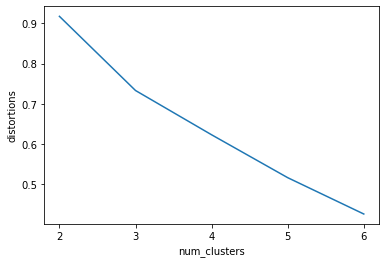

In [18]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Impact of seeds on distinct clusters

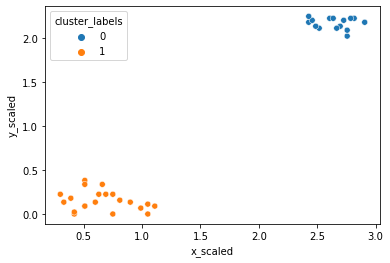

In [20]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Uniform clustering patterns

In [21]:
mouse = {'x_coordinate': {0: 33.875528010208775,
  1: 38.208747889149606,
  2: 35.740587879668375,
  3: 32.54696342954206,
  4: 62.06314582832662,
  5: 53.769683890896005,
  6: 32.49035021952977,
  7: 55.3252017626829,
  8: 68.10254176198403,
  9: 53.283123547122216,
  10: 67.71803005072717,
  11: 32.845502853646536,
  12: 61.78083409365266,
  13: 62.072467329911454,
  14: 37.2423104965403,
  15: 48.39279681160971,
  16: 35.48978845302275,
  17: 65.60854565818534,
  18: 38.02888393506392,
  19: 65.49367503080025,
  20: 41.60372438786939,
  21: 48.41398475297436,
  22: 41.81966990296046,
  23: 51.769182700772454,
  24: 45.179950587632945,
  25: 38.02218596797351,
  26: 56.37185205882892,
  27: 52.05250382127925,
  28: 44.24373638076516,
  29: 40.33281190433085,
  30: 53.59657550320356,
  31: 45.872652957168775,
  32: 54.000011702824835,
  33: 52.6886879008935,
  34: 53.25422917515853,
  35: 63.54212627168273,
  36: 65.38884629108937,
  37: 49.7331204244559,
  38: 48.58080531427996,
  39: 48.03000662249777,
  40: 44.667125096576456,
  41: 65.30935895573465,
  42: 40.58584806552085,
  43: 43.935337781568315,
  44: 32.873749638659994,
  45: 43.17638645624066,
  46: 61.44735547191348,
  47: 47.902126357633676,
  48: 47.572750544262746,
  49: 50.65221646915222,
  50: 45.446521013813914,
  51: 48.17757170967687,
  52: 50.11893027842959,
  53: 37.33082580526986,
  54: 53.28605844737083,
  55: 32.606017427486364,
  56: 46.59545711595761,
  57: 54.91413224060491,
  58: 61.18758173081231,
  59: 62.25623799525337,
  60: 47.807103448547345,
  61: 65.44265167099898,
  62: 36.17446484734976,
  63: 60.90339817677179,
  64: 44.238116884086224,
  65: 40.34232188761509,
  66: 57.1991023845528,
  67: 36.08806304674293,
  68: 35.56663866798864,
  69: 42.41968176650849,
  70: 59.65269146405017,
  71: 32.624629292084094,
  72: 55.802169917560185,
  73: 65.49918670396143,
  74: 45.54670963865595,
  75: 61.005369016634205,
  76: 58.19939103997329,
  77: 63.119317713784035,
  78: 55.317083131439325,
  79: 45.609472159593864,
  80: 45.63141644596187,
  81: 46.74818574516722,
  82: 68.2835242879107,
  83: 61.96714674680341,
  84: 48.961046192567,
  85: 45.37856387981091,
  86: 50.841168640885435,
  87: 52.56595620799083,
  88: 39.13493120568782,
  89: 48.991763726168436,
  90: 58.05200857676577,
  91: 41.37122590593515,
  92: 64.3514005533457,
  93: 35.02226785177038,
  94: 48.60847434578881,
  95: 42.6486493170514,
  96: 57.584951487904185,
  97: 49.08107020583896,
  98: 51.426592405160875,
  99: 62.315517190744416,
  100: 26.840752816458078,
  101: 26.951941203374947,
  102: 32.5621398164603,
  103: 27.108845406070458,
  104: 20.77972887648475,
  105: 34.64864231015485,
  106: 27.334714397277274,
  107: 38.63528805644043,
  108: 27.362780877847065,
  109: 22.25173068139633,
  110: 23.561817911734813,
  111: 28.6834020635391,
  112: 33.84077612867423,
  113: 28.223160262959322,
  114: 38.08583937546411,
  115: 29.88562783705242,
  116: 28.408504942406417,
  117: 31.72078699025845,
  118: 25.21073980042423,
  119: 28.676889274075087,
  120: 32.248620751649284,
  121: 26.387527137544257,
  122: 28.699010037068682,
  123: 26.075497431739343,
  124: 34.287109826660135,
  125: 24.026824037174762,
  126: 30.83187786615126,
  127: 32.37571558869186,
  128: 22.76230802134732,
  129: 35.251223510448035,
  130: 70.1823912319945,
  131: 79.58988481728986,
  132: 65.72716493320895,
  133: 68.48339899780753,
  134: 76.4135846784469,
  135: 79.26874522519233,
  136: 64.84182258980695,
  137: 71.11774101770646,
  138: 78.34020407876903,
  139: 63.61846310591197,
  140: 67.53968320798616,
  141: 69.1508780470645,
  142: 67.79213380348288,
  143: 76.87140430526,
  144: 62.00437158352073,
  145: 67.49125960815724,
  146: 71.90747912630009,
  147: 65.27576084118527,
  148: 77.58529514762616,
  149: 79.66066417912315,
  150: 77.32463519764799,
  151: 68.5790017971886,
  152: 65.9764957476465,
  153: 71.55575552204994,
  154: 69.83671682593541,
  155: 70.4943218813415,
  156: 72.62743438217248,
  157: 67.66970193136962,
  158: 63.44559188910216,
  159: 75.45783601312209},
 'x_scaled': {0: 2.209458273773183,
  1: 2.492083197308515,
  2: 2.331102782411336,
  3: 2.122805513582657,
  4: 4.047934869250256,
  5: 3.5070116963226825,
  6: 2.119113039026133,
  7: 3.608466995581365,
  8: 4.441841447184339,
  9: 3.4752768469967337,
  10: 4.416762499882229,
  11: 2.1422771038243305,
  12: 4.0295216950623685,
  13: 4.048542844092579,
  14: 2.429049402158786,
  15: 3.156315829947019,
  16: 2.314744930569359,
  17: 4.279175928741777,
  18: 2.480351958716797,
  19: 4.271683739748797,
  20: 2.7135132193616447,
  21: 3.157697767738165,
  22: 2.7275977999727097,
  23: 3.3765333195759184,
  24: 2.9467648623639557,
  25: 2.479915098255142,
  26: 3.6767325044132884,
  27: 3.3950123287783662,
  28: 2.8857023093385195,
  29: 2.6306206928997806,
  30: 3.4957210749829546,
  31: 2.991944880847269,
  32: 3.5220343312346123,
  33: 3.43650606366341,
  34: 3.4733922738859793,
  35: 4.144398179765656,
  36: 4.2648465112275575,
  37: 3.243735547657223,
  38: 3.1685782791593025,
  39: 3.1326536220919694,
  40: 2.9133169254380697,
  41: 4.259662121165602,
  42: 2.647124430929681,
  43: 2.865587675659299,
  44: 2.1441194394725502,
  45: 2.8160867118770967,
  46: 4.007771270989095,
  47: 3.1243129075451397,
  48: 3.102830080301418,
  49: 3.3036816054643374,
  50: 2.964151343645998,
  51: 3.142278236730881,
  52: 3.2688991635190483,
  53: 2.434822622318459,
  54: 3.475468269537367,
  55: 2.1266571832693435,
  56: 3.0390882236306607,
  57: 3.5816558723310497,
  58: 3.990828088836716,
  59: 4.060528889502533,
  60: 3.1181152431835533,
  61: 4.268355851119736,
  62: 2.359401472124877,
  63: 3.972292829266566,
  64: 2.885335789784109,
  65: 2.6312409610545524,
  66: 3.7306881232334987,
  67: 2.35376610097547,
  68: 2.3197573201399795,
  69: 2.766732280057529,
  70: 3.890718180639579,
  71: 2.1278711020077736,
  72: 3.639576215068729,
  73: 4.272043226746745,
  74: 2.970685930679696,
  75: 3.978943657432247,
  76: 3.7959297940117143,
  77: 4.116821403215049,
  78: 3.607937475363483,
  79: 2.9747794807825123,
  80: 2.97621074954571,
  81: 3.0490496191651455,
  82: 4.453645642212576,
  83: 4.041673536146248,
  84: 3.1933786705895084,
  85: 2.959718986106372,
  86: 3.316005603456562,
  87: 3.428501153621675,
  88: 2.552491507140301,
  89: 3.195382155487077,
  90: 3.786317090627584,
  91: 2.6983490071789,
  92: 4.197181349871027,
  93: 2.2842519073968446,
  94: 3.170382932080907,
  95: 2.7816661948534893,
  96: 3.7558542990513564,
  97: 3.201206978065492,
  98: 3.3541886062204456,
  99: 4.064395247213645,
  100: 1.7506302297857137,
  101: 1.7578822525836146,
  102: 2.1237953606968447,
  103: 1.768115990895558,
  104: 1.3553130117728844,
  105: 2.259882987037385,
  106: 1.7828478088397774,
  107: 2.519903360035818,
  108: 1.7846783845194223,
  109: 1.4513211556427255,
  110: 1.5367687704980166,
  111: 1.8708130538998697,
  112: 2.207191657230334,
  113: 1.8407947748070448,
  114: 2.4840667545124724,
  115: 1.949225637799134,
  116: 1.8528834818931987,
  117: 2.0689199366900537,
  118: 1.6443161453661694,
  119: 1.8703882712496254,
  120: 2.1033467556884275,
  121: 1.7210695621007455,
  122: 1.8718310503202171,
  123: 1.7007180973222211,
  124: 2.236302810319418,
  125: 1.5670977924072511,
  126: 2.0109427556908606,
  127: 2.111636242399098,
  128: 1.4846224617601045,
  129: 2.2991850465715338,
  130: 4.577495144399997,
  131: 5.1910786295411,
  132: 4.286912615194338,
  133: 4.466682039205901,
  134: 4.9839113015620775,
  135: 5.170132992071414,
  136: 4.229168069776129,
  137: 4.638501317419365,
  138: 5.109570897869206,
  139: 4.149377085184654,
  140: 4.405130211606849,
  141: 4.510216921009268,
  142: 4.4215957573769735,
  143: 5.0137715995935395,
  144: 4.044101445858834,
  145: 4.401971886716514,
  146: 4.690010282759192,
  147: 4.257470756586666,
  148: 5.060333590531702,
  149: 5.195695060805812,
  150: 5.0433326073161195,
  151: 4.472917525661631,
  152: 4.30317467997159,
  153: 4.667069869040544,
  154: 4.554949276590388,
  155: 4.597840148434634,
  156: 4.7369678119925185,
  157: 4.413610402499769,
  158: 4.13810193280437,
  159: 4.921574655602989},
 'y_coordinate': {0: 44.89342094946078,
  1: 41.11632695012222,
  2: 57.41800587821296,
  3: 57.21808248658115,
  4: 47.19694447881652,
  5: 35.9519591663506,
  6: 42.0218536061098,
  7: 52.548322206341886,
  8: 52.31212455866878,
  9: 31.63628689308561,
  10: 47.605248069586594,
  11: 54.23496141308666,
  12: 60.824987602248825,
  13: 65.23558661122223,
  14: 48.237577085508796,
  15: 67.52456486435298,
  16: 54.10211413900534,
  17: 51.8513512002574,
  18: 39.82817720810414,
  19: 44.28386899368546,
  20: 60.21348801168716,
  21: 45.355137861258946,
  22: 35.81066078526795,
  23: 56.95992181229278,
  24: 61.05673695261803,
  25: 44.34557019681759,
  26: 49.53371077686823,
  27: 57.76601797690635,
  28: 41.7427565034216,
  29: 52.07742896956642,
  30: 55.58701182345966,
  31: 43.81629666563168,
  32: 61.46690780645113,
  33: 44.3775923583563,
  34: 44.722751130263774,
  35: 47.98225455002846,
  36: 47.73690085784043,
  37: 46.049823776856826,
  38: 56.78708412569725,
  39: 56.60380297058407,
  40: 61.716042124809185,
  41: 56.52781556973503,
  42: 45.81317068292476,
  43: 49.107768819361304,
  44: 41.14505631914088,
  45: 64.84595736862047,
  46: 62.46952021318698,
  47: 58.299124711890485,
  48: 48.533208073849394,
  49: 48.79467674278415,
  50: 40.65821117776538,
  51: 30.466588286384656,
  52: 65.1805398242621,
  53: 41.73000679928131,
  54: 69.24321762302908,
  55: 56.00106984258167,
  56: 39.63738121453994,
  57: 38.404587085375475,
  58: 39.63915234786564,
  59: 38.73957077928137,
  60: 36.00996935366802,
  61: 45.627290421255125,
  62: 57.17020664932346,
  63: 51.32130044599607,
  64: 40.89880525190646,
  65: 41.15484687210742,
  66: 58.21497749474327,
  67: 43.45728537166188,
  68: 42.722747180257315,
  69: 39.27124659372834,
  70: 42.66172394093738,
  71: 57.407147546037336,
  72: 34.25546896017839,
  73: 61.2946118575901,
  74: 30.513927856422505,
  75: 65.03769516099436,
  76: 63.378856912574534,
  77: 62.926205725335116,
  78: 35.88019396665801,
  79: 52.89656062679065,
  80: 37.259020806758414,
  81: 31.67028002331956,
  82: 47.16555533297543,
  83: 50.8823970375166,
  84: 41.77975390328266,
  85: 49.38557057141355,
  86: 52.58865855257825,
  87: 40.89034885614024,
  88: 65.91171887261399,
  89: 46.57669291055369,
  90: 63.5556821473357,
  91: 45.45012239907503,
  92: 43.705265331740556,
  93: 46.58949706968058,
  94: 38.91660455701806,
  95: 55.46764508050404,
  96: 67.89462117284727,
  97: 36.02362380728002,
  98: 59.985360625320176,
  99: 54.70049854246623,
  100: 82.72356822426191,
  101: 77.9444363345605,
  102: 75.40050306769567,
  103: 68.91634077469779,
  104: 72.84274950158657,
  105: 74.71747015717696,
  106: 70.61496974587016,
  107: 76.12679437605598,
  108: 80.60280864557596,
  109: 70.19696261830036,
  110: 68.23133122814531,
  111: 83.83579386727436,
  112: 83.97371742515891,
  113: 70.71122298781704,
  114: 72.22425104319395,
  115: 79.61715461567954,
  116: 74.81720151229194,
  117: 81.28549433293101,
  118: 79.839476126322,
  119: 82.54505219682139,
  120: 72.41216493735487,
  121: 74.60395650171206,
  122: 68.84261456484317,
  123: 73.28936759848196,
  124: 80.51600556553831,
  125: 82.6396572856646,
  126: 66.38754731793188,
  127: 73.35737436223333,
  128: 72.53759838415348,
  129: 73.71960774659767,
  130: 78.16166533096742,
  131: 75.99349930565272,
  132: 67.237386284613,
  133: 82.50606008627572,
  134: 77.72556254117448,
  135: 73.68057342677461,
  136: 83.33967752728628,
  137: 84.67897397759208,
  138: 71.78110971610965,
  139: 68.1659101899457,
  140: 83.8792565462558,
  141: 74.22367681669748,
  142: 78.1526834527262,
  143: 74.21207006805605,
  144: 75.13106435618263,
  145: 77.71960453281291,
  146: 71.08256275442666,
  147: 74.66344797163669,
  148: 80.35559980446331,
  149: 73.34017066404198,
  150: 70.12614603304121,
  151: 77.46797550765935,
  152: 77.65232497035855,
  153: 76.70948616089562,
  154: 73.94355101042667,
  155: 71.19864360817556,
  156: 76.4341868745873,
  157: 70.62890953003463,
  158: 78.5744388997699,
  159: 68.4489350236011},
 'y_scaled': {0: 2.977523635649635,
  1: 2.7270106112632395,
  2: 3.808207661579468,
  3: 3.794947887400684,
  4: 3.1303031656759415,
  5: 2.384487657695536,
  6: 2.7870690109995637,
  7: 3.485229418342975,
  8: 3.46956378039965,
  9: 2.0982538192934608,
  10: 3.157383605667519,
  11: 3.5970945423786214,
  12: 4.034173257317054,
  13: 4.3267030427253745,
  14: 3.19932236975803,
  15: 4.478517867838779,
  16: 3.5882835431243194,
  17: 3.4390033210643716,
  18: 2.6415750124160793,
  19: 2.9370955435797366,
  20: 3.9936159897802996,
  21: 3.0081466754800332,
  22: 2.3751161448890996,
  23: 3.7778255676212615,
  24: 4.049543865162858,
  25: 2.9411878311975763,
  26: 3.2852874982638114,
  27: 3.8312893120181397,
  28: 2.7685580977672894,
  29: 3.4539977654033396,
  30: 3.686768306781816,
  31: 2.9060841475062866,
  32: 4.076748150024944,
  33: 2.943311677873316,
  34: 2.9662040834791013,
  35: 3.18238828747986,
  36: 3.16611538151428,
  37: 3.0542212157868227,
  38: 3.7663622332153466,
  39: 3.7542062433224617,
  40: 4.093271803283573,
  41: 3.7491664339861606,
  42: 3.0385253707001767,
  43: 3.257037206370941,
  44: 2.7289160658595075,
  45: 4.300861165353343,
  46: 4.143245691876617,
  47: 3.8666472301755963,
  48: 3.218929880983462,
  49: 3.236271601112376,
  50: 2.6966264143985814,
  51: 2.020674406221792,
  52: 4.323052104441459,
  53: 2.7677124828726707,
  54: 4.59250626752419,
  55: 3.7142304050668624,
  56: 2.6289206063046766,
  57: 2.547156428395187,
  58: 2.6290380754399667,
  59: 2.569373979320631,
  60: 2.3883351413622527,
  61: 3.026196996947035,
  62: 3.7917725571630583,
  63: 3.403848088615418,
  64: 2.7125836421437954,
  65: 2.7295654171953476,
  66: 3.8610662269321137,
  67: 2.882272983405791,
  68: 2.8335552697644855,
  69: 2.604636992709637,
  70: 2.829507947605553,
  71: 3.8074874905608005,
  72: 2.271969173256302,
  73: 4.065320745981978,
  74: 2.0238141689243907,
  75: 4.313578035588811,
  76: 4.203556789982465,
  77: 4.173535027768631,
  78: 2.3797278827934996,
  79: 3.508326079408185,
  80: 2.471177574508659,
  81: 2.100508389040668,
  82: 3.1282213033079587,
  83: 3.3747381378726127,
  84: 2.771011923522023,
  85: 3.275462206410293,
  86: 3.4879046972982084,
  87: 2.7120227778181594,
  88: 4.371547025352263,
  89: 3.089165429555756,
  90: 4.21528459563295,
  91: 3.0144464561692135,
  92: 2.8987200746874495,
  93: 3.0900146561379285,
  94: 2.581115616432954,
  95: 3.678851393992724,
  96: 4.503061584529547,
  97: 2.389240763110423,
  98: 3.978485606074158,
  99: 3.6279709553737596,
  100: 5.486580759579503,
  101: 5.169608297723848,
  102: 5.000883765945959,
  103: 4.570826397261044,
  104: 4.831242612828434,
  105: 4.955582102762716,
  106: 4.683486733740162,
  107: 5.049054511041198,
  108: 5.3459229162358985,
  109: 4.655762713696998,
  110: 4.5253936351242094,
  111: 5.560348319952622,
  112: 5.569496000054267,
  113: 4.689870660312107,
  114: 4.790221150450904,
  115: 5.280550126447974,
  116: 4.962196712671917,
  117: 5.391201550094247,
  118: 5.295295439650914,
  119: 5.4747408133289195,
  120: 4.80268440340641,
  121: 4.948053391763031,
  122: 4.565936559780044,
  123: 4.8608642346939614,
  124: 5.340165764809406,
  125: 5.481015427339746,
  126: 4.4031060024247255,
  127: 4.865374734053805,
  128: 4.811003685934786,
  129: 4.889399600966496,
  130: 5.184015853607775,
  131: 5.040213812020108,
  132: 4.459470956493112,
  133: 5.4721546898324664,
  134: 5.1550916518713334,
  135: 4.886810677970284,
  136: 5.527443762957301,
  137: 5.616271630194606,
  138: 4.760830122825453,
  139: 4.521054632139177,
  140: 5.563230950663291,
  141: 4.922831617027641,
  142: 5.183420137037504,
  143: 4.922061807828832,
  144: 4.983013438514414,
  145: 5.154696491281144,
  146: 4.7144995014329805,
  147: 4.951999120426024,
  148: 5.329526968861268,
  149: 4.864233711229035,
  150: 4.651065854960336,
  151: 5.138007378400804,
  152: 5.1502342230207345,
  153: 5.087701121724132,
  154: 4.904252475775168,
  155: 4.722198479999858,
  156: 5.069442095913127,
  157: 4.684411279830609,
  158: 5.2113927616554925,
  159: 4.539826049283649}}

mouse = pd.DataFrame(mouse)

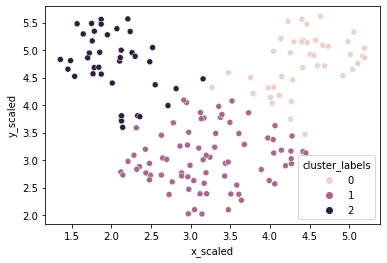

In [22]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled','y_scaled']],3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled','y_scaled']],cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

### FIFA 18: defenders revisited

In [31]:
from scipy.cluster.vq import whiten
data = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Cluster Analysis in Python/fifa_18_sample_data.csv')
fifa = data[0:250]
data_scaled = pd.DataFrame(whiten(fifa[['def','phy']]),columns=['scaled_def','scaled_phy'])
fifa = pd.concat([fifa, data_scaled], axis=1)

                scaled_def  scaled_phy
cluster_labels                        
0                 3.743692    8.867419
1                 1.865936    7.082691
2                 2.096297    8.944870


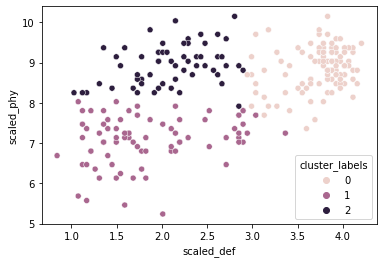

In [32]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()